In [1]:
from scipy import stats
from matplotlib.pyplot import *
from numpy import *
import fastIsing, scipy
import networkx as nx, IO, multiprocessing as mp
from tqdm import tqdm_notebook as tqdm

dataDir = 'Psycho' # relative path careful
df    = IO.readCSV('{}/Graph_min1_1.csv'.format(dataDir), header = 0, index_col = 0)
h     = IO.readCSV('{}/External_min1_1.csv'.format(dataDir), header = 0, index_col = 0)
graph   = nx.from_pandas_adjacency(df) 
# graph = nx.random_graphs.barabasi_albert_graph(10, 3)
# graph = nx.grid_2d_graph(2, 2, periodic = True)
# graph  = nx.path_graph(5, nx.DiGraph())
# graph.add_edge(0, 0)
# graph  = nx.path_graph(3, nx.DiGraph())
# graph  = nx.path_graph(3)
pulse  = {}
nudge  = 0
target = 1
for node in graph.nodes():
    pulse[node] = nudge if node == target else 0
nx.set_node_attributes(graph, pulse, 'nudges')
temp  = 1
model = fastIsing.Ising(graph, temp, False, mode = 'async', verbose = True, magSide = '')

temps = linspace(0, 10, 50)
temps, mag, sus = model.matchMagnetization(temps =  temps, n = 1000, burninSamples = 10)
func = lambda x, a, b, c, d :  a / (1 + exp(b * (x - c))) + d # tanh(-a * x)* b + c
a, b = scipy.optimize.curve_fit(func, temps, mag, maxfev = 10000)
xx = linspace(0, max(temps))
fig, ax = subplots();
ax.scatter(temps,  mag)
ax.plot(xx, func(xx, *a), 'k--')

match = .7 * max(mag)
fr  = lambda x, a, b : func(x, *a) - b
rr  = scipy.optimize.root(fr, 0, args = (a, match))
ax.scatter(rr.x, func(rr.x, *a), c = 'red')


model.t = rr.x
N =  int(1e3)
res = model.simulate(N, verbose = True)
n = res.shape[0]


delta = 10
cond  = {}
cc    = {}
state = {}

Z   = n - delta 
jdx = 1

for i in tqdm(range(delta, n - jdx)):
    tmp = res[i - delta: i + jdx]
    x =  tuple(res[i])
    state[x] = state.get(x, 0) + 1 / Z
    cond[x] = cond.get(x, zeros(tmp.shape)) +  ((tmp + 1) / 2)
    cc[x] = cc.get(x, 0) + 1
print(f'unique states {len(cond)}')    

H  = zeros((delta + jdx, model.nNodes))
px = zeros((delta + jdx, model.nNodes))

for key, value in tqdm(cond.items()):
    z = value / cc[key]
    assert all(z - 1 - z) == 1
    z[isnan(z)] = 0
    px += value / Z
    x = dstack((z * log2(z), (1 - z) * log2(1 - z)))
    x = nansum(x, -1)
    H += state[key] * x
tmp = nansum(dstack((px * log2(px), (1 - px) * log2(1 - px))), -1)
H  -= tmp



  0%|          | 0/50 [00:00<?, ?it/s]

external field not detected assuming 0
Initialized ISING model with 
temperature: 1
mode: async
No burnin used
Setting T = 0.0, beta = inf
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 13


absolute mean magnetization last sample 0.6666666666666666


  2%|▏         | 1/50 [00:00<00:16,  2.94it/s]

Setting T = 0.20408163265306123, beta = 4.8999999999999995
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 14


absolute mean magnetization last sample 0.6666666666666666


  4%|▍         | 2/50 [00:00<00:17,  2.79it/s]

Setting T = 0.40816326530612246, beta = 2.4499999999999997
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 31


absolute mean magnetization last sample 0.6666666666666666


  6%|▌         | 3/50 [00:01<00:16,  2.77it/s]

Setting T = 0.6122448979591837, beta = 1.6333333333333333
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 15


absolute mean magnetization last sample 0.6666666666666666


  8%|▊         | 4/50 [00:01<00:17,  2.66it/s]

Setting T = 0.8163265306122449, beta = 1.2249999999999999
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 14


absolute mean magnetization last sample 0.5


 10%|█         | 5/50 [00:01<00:16,  2.66it/s]

Setting T = 1.0204081632653061, beta = 0.98
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 25


absolute mean magnetization last sample 0.6666666666666666


 12%|█▏        | 6/50 [00:02<00:16,  2.71it/s]

Setting T = 1.2244897959183674, beta = 0.8166666666666667
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 19


absolute mean magnetization last sample 0.5


 14%|█▍        | 7/50 [00:02<00:15,  2.83it/s]

Setting T = 1.4285714285714286, beta = 0.7
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 13


absolute mean magnetization last sample 0.6666666666666666


 16%|█▌        | 8/50 [00:02<00:14,  2.92it/s]

Setting T = 1.6326530612244898, beta = 0.6124999999999999
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 12


absolute mean magnetization last sample 0.5


 18%|█▊        | 9/50 [00:03<00:13,  2.98it/s]

Setting T = 1.836734693877551, beta = 0.5444444444444444
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 12


absolute mean magnetization last sample 0.16666666666666666


 20%|██        | 10/50 [00:03<00:13,  2.89it/s]

Setting T = 2.0408163265306123, beta = 0.49
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 13


absolute mean magnetization last sample 0.5


 22%|██▏       | 11/50 [00:03<00:13,  2.94it/s]

Setting T = 2.2448979591836737, beta = 0.4454545454545454
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 14


absolute mean magnetization last sample 0.5


 24%|██▍       | 12/50 [00:04<00:12,  2.93it/s]

Setting T = 2.4489795918367347, beta = 0.4083333333333333
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 21


absolute mean magnetization last sample 0.5


 26%|██▌       | 13/50 [00:04<00:13,  2.79it/s]

Setting T = 2.6530612244897958, beta = 0.37692307692307697
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 24


absolute mean magnetization last sample 0.3333333333333333


 28%|██▊       | 14/50 [00:05<00:13,  2.72it/s]

Setting T = 2.857142857142857, beta = 0.35
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 12


absolute mean magnetization last sample 0.16666666666666666


 30%|███       | 15/50 [00:05<00:12,  2.78it/s]

Setting T = 3.0612244897959187, beta = 0.32666666666666666
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 34


absolute mean magnetization last sample 0.16666666666666666


 32%|███▏      | 16/50 [00:05<00:12,  2.81it/s]

Setting T = 3.2653061224489797, beta = 0.30624999999999997
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 23


absolute mean magnetization last sample 0.16666666666666666


 34%|███▍      | 17/50 [00:06<00:11,  2.85it/s]

Setting T = 3.4693877551020407, beta = 0.2882352941176471
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 21


absolute mean magnetization last sample 0.3333333333333333


 36%|███▌      | 18/50 [00:06<00:10,  2.94it/s]

Setting T = 3.673469387755102, beta = 0.2722222222222222
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 26


absolute mean magnetization last sample 0.16666666666666666


 38%|███▊      | 19/50 [00:06<00:10,  2.99it/s]

Setting T = 3.8775510204081636, beta = 0.25789473684210523
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 19


absolute mean magnetization last sample 0.6666666666666666


 40%|████      | 20/50 [00:07<00:10,  2.97it/s]

Setting T = 4.081632653061225, beta = 0.245
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 24


absolute mean magnetization last sample 0.5


 42%|████▏     | 21/50 [00:07<00:09,  3.00it/s]

Setting T = 4.285714285714286, beta = 0.23333333333333334
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 25


absolute mean magnetization last sample 0.5


 44%|████▍     | 22/50 [00:07<00:09,  3.04it/s]

Setting T = 4.4897959183673475, beta = 0.2227272727272727
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 24


absolute mean magnetization last sample 0.5


 46%|████▌     | 23/50 [00:08<00:08,  3.04it/s]

Setting T = 4.6938775510204085, beta = 0.21304347826086956
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 33


absolute mean magnetization last sample 0.16666666666666666


 48%|████▊     | 24/50 [00:08<00:08,  3.02it/s]

Setting T = 4.8979591836734695, beta = 0.20416666666666666
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 31


absolute mean magnetization last sample 0.6666666666666666


 50%|█████     | 25/50 [00:08<00:08,  3.03it/s]

Setting T = 5.1020408163265305, beta = 0.196
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 15


absolute mean magnetization last sample 0.3333333333333333


 52%|█████▏    | 26/50 [00:08<00:07,  3.08it/s]

Setting T = 5.3061224489795915, beta = 0.18846153846153849
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 14


absolute mean magnetization last sample 0.3333333333333333


 54%|█████▍    | 27/50 [00:09<00:07,  3.13it/s]

Setting T = 5.510204081632653, beta = 0.18148148148148147
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 14


absolute mean magnetization last sample 0.3333333333333333


 56%|█████▌    | 28/50 [00:09<00:06,  3.17it/s]

Setting T = 5.714285714285714, beta = 0.175
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 13


absolute mean magnetization last sample 0.16666666666666666


 58%|█████▊    | 29/50 [00:09<00:06,  3.20it/s]

Setting T = 5.918367346938775, beta = 0.16896551724137931
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 13


absolute mean magnetization last sample 0.16666666666666666


 60%|██████    | 30/50 [00:10<00:06,  3.21it/s]

Setting T = 6.122448979591837, beta = 0.16333333333333333
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 34


absolute mean magnetization last sample 0.16666666666666666


 62%|██████▏   | 31/50 [00:10<00:05,  3.20it/s]

Setting T = 6.326530612244898, beta = 0.15806451612903225
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 38


absolute mean magnetization last sample 0.16666666666666666


 64%|██████▍   | 32/50 [00:10<00:05,  3.06it/s]

Setting T = 6.530612244897959, beta = 0.15312499999999998
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 15


absolute mean magnetization last sample 0.5


 66%|██████▌   | 33/50 [00:11<00:05,  3.02it/s]

Setting T = 6.73469387755102, beta = 0.1484848484848485
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 16


absolute mean magnetization last sample 0.16666666666666666


 68%|██████▊   | 34/50 [00:11<00:05,  3.07it/s]

Setting T = 6.938775510204081, beta = 0.14411764705882354
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 32


absolute mean magnetization last sample 0.16666666666666666


 70%|███████   | 35/50 [00:11<00:04,  3.07it/s]

Setting T = 7.142857142857143, beta = 0.13999999999999999
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 17


absolute mean magnetization last sample 0.16666666666666666


 72%|███████▏  | 36/50 [00:12<00:04,  3.09it/s]

Setting T = 7.346938775510204, beta = 0.1361111111111111
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 13


absolute mean magnetization last sample 0.5


 74%|███████▍  | 37/50 [00:12<00:04,  3.14it/s]

Setting T = 7.551020408163265, beta = 0.13243243243243244
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 24


absolute mean magnetization last sample 0.16666666666666666


 76%|███████▌  | 38/50 [00:12<00:03,  3.13it/s]

Setting T = 7.755102040816327, beta = 0.12894736842105262
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 15


absolute mean magnetization last sample 0.16666666666666666


 78%|███████▊  | 39/50 [00:13<00:03,  3.11it/s]

Setting T = 7.959183673469388, beta = 0.12564102564102564
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 26


absolute mean magnetization last sample 0.16666666666666666


 80%|████████  | 40/50 [00:13<00:03,  2.99it/s]

Setting T = 8.16326530612245, beta = 0.1225
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 29


absolute mean magnetization last sample 0.3333333333333333


 82%|████████▏ | 41/50 [00:13<00:03,  2.99it/s]

Setting T = 8.36734693877551, beta = 0.11951219512195121
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 23


absolute mean magnetization last sample 0.3333333333333333


 84%|████████▍ | 42/50 [00:14<00:02,  3.03it/s]

Setting T = 8.571428571428571, beta = 0.11666666666666667
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 30


absolute mean magnetization last sample 0.0


 86%|████████▌ | 43/50 [00:14<00:02,  3.05it/s]

Setting T = 8.775510204081632, beta = 0.11395348837209303
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 18


absolute mean magnetization last sample 0.3333333333333333


 88%|████████▊ | 44/50 [00:14<00:01,  3.07it/s]

Setting T = 8.979591836734695, beta = 0.11136363636363635
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 13


absolute mean magnetization last sample 0.3333333333333333


 90%|█████████ | 45/50 [00:15<00:01,  3.11it/s]

Setting T = 9.183673469387756, beta = 0.10888888888888888
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 14


absolute mean magnetization last sample 0.5


 92%|█████████▏| 46/50 [00:15<00:01,  3.11it/s]

Setting T = 9.387755102040817, beta = 0.10652173913043478
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 21


absolute mean magnetization last sample 0.3333333333333333


 94%|█████████▍| 47/50 [00:15<00:00,  3.13it/s]

Setting T = 9.591836734693878, beta = 0.10425531914893617
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 25


absolute mean magnetization last sample 0.16666666666666666


 96%|█████████▌| 48/50 [00:16<00:00,  3.12it/s]

Setting T = 9.795918367346939, beta = 0.10208333333333333
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 15


absolute mean magnetization last sample 0.5


 98%|█████████▊| 49/50 [00:16<00:00,  3.11it/s]

Setting T = 10.0, beta = 0.1
Equilibrating using N = 10
Starting burnin
Number of bunin samples used 18


absolute mean magnetization last sample 0.5


 28%|██▊       | 284/1000 [00:00<00:00, 2836.41it/s]

Setting T = [0.3655192], beta = [2.73583443]
Simulation parameters
 number of samples: 1000
 step size 1
 pulse : {}


100%|██████████| 1000/1000 [00:00<00:00, 2741.74it/s]



unique states 55


/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: divide by zero encountered in log2
/home/casper/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in multiply


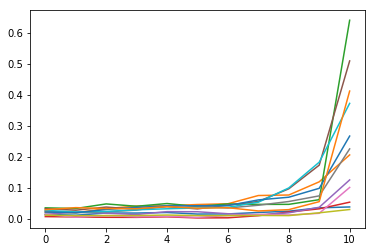

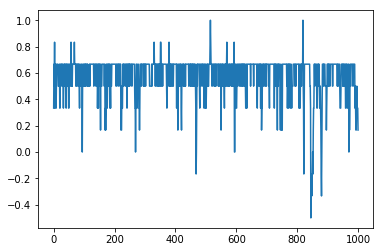

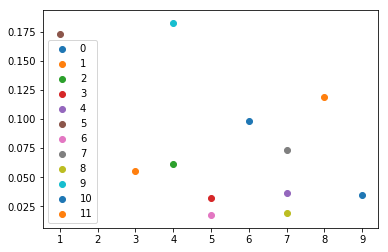

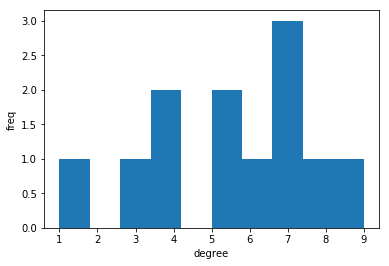

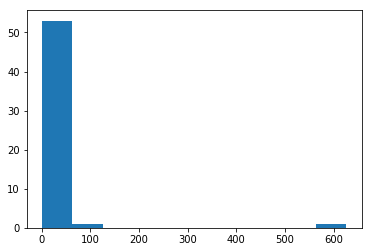

int16


In [2]:
fig, ax = subplots(); ax.plot(H);
fig, ax = subplots(); ax.plot(res.mean(1)) #
fig, ax = subplots()
for node in model.nodeIDs:
    deg = len(model.edgeData[node])
    ax.scatter(deg, H[-2, node], label = node)
ax.legend()
   
fig, ax = subplots()
ax.hist(list(dict(nx.degree(graph)).values()))
setp(ax, **dict(xlabel = 'degree', ylabel = 'freq'));
fig, ax = subplots(); ax.hist(cc.values())
show()

print(res.dtype)

(-4, 11)

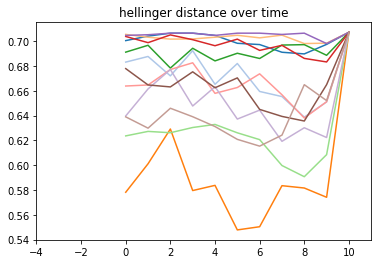

In [3]:
# showing hellinger distance over time
colors = cm.tab20(arange(model.nNodes))
hd = lambda x, y: linalg.norm( sqrt(x) - sqrt (y), axis = -1) / sqrt(2)
d = zeros(H.shape)
for key, value in cond.items():
    x = value[..., None] / cc[key]
    d += hd(x,  1 - x)
d /= len(cond)


fig, ax = subplots(); 
[ax.plot(i, color = c) for i, c in zip(d.T, colors)]
ax.set_title('hellinger distance over time')
ax.set_xlim(len(x) - 15, len(x))

/home/casper/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


100.0


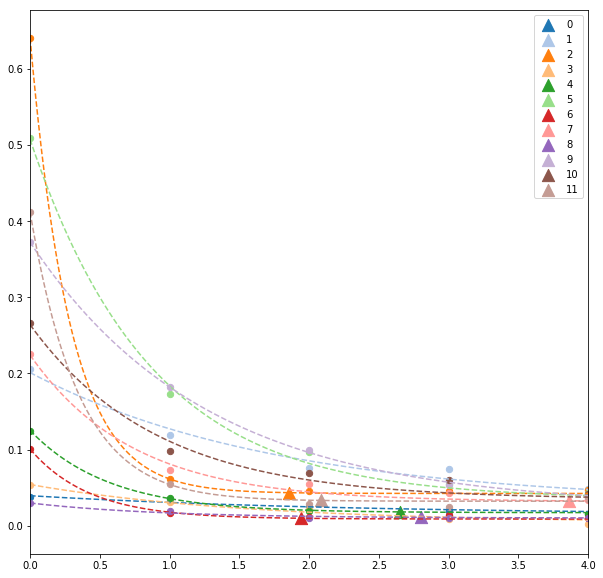

In [4]:
from scipy import optimize
func = lambda x, a, b, c, d, e, f : a + b*exp(-c*x) # + d * exp(-e * (x -f))
f2   = lambda x, a, b : func(x, *a) - b
fig, ax = subplots(figsize = (10, 10))
s = 0
idt = zeros((model.nNodes, 2))
theta = 1e-3

colors = cm.tab20(arange(model.nNodes))
for idx, y in enumerate(H.T):
    y = y[::-1]
    x = arange(len(y))
    xx = linspace(0, 10, 1000)
    try:
        a, b = optimize.curve_fit(func, x,  y, maxfev = 10000) # fit
        
        
        ax.plot(xx, func(xx, *a), '--', color = colors[idx], alpha = 1) # plot fit
        
        findThis = a[0] + theta
        tmp = (tuple(a),  findThis)
        r  = optimize.root(f2,  x0 = 0, args = tmp)
        rr = optimize.root(f2, x0 = 0 , args = (tuple(a), 1e-4))
        idt[idx] = (r.x, rr.x)
        
        ax.scatter(r.x, func(r.x, *a), color = colors[idx], s = 150, marker = '^', label = idx) # plot root 1
        ax.scatter(rr.x, func(rr.x, *a), s = 150,  color = colors[idx], marker = 's')    
        s += 1
    except Exception as e : print(e)
    ax.scatter(x, y, color = colors[idx], s = 40)
ax.legend()
print(s / model.nNodes * 100)
ax.set_xlim(0,4)
# ax.set_xlim(0, 10)
# ax.set_ylim(0, 1)
# ax.set_xscale('log')
show()

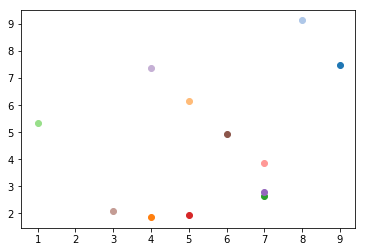

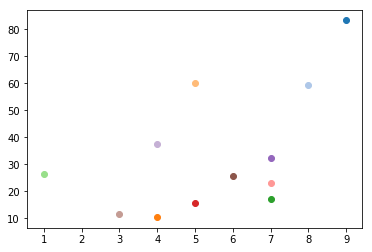

In [5]:
fig, ax = subplots()
fig, axx = subplots()
for node, deg in nx.degree(model.graph):
    idx = model.mapping[node]
    ax.scatter(deg, idt[idx, 0], c = colors[idx])
    axx.scatter(deg, idt[idx, 1], c = colors[idx])
# ax.set_ylim(0, -5)
# axx.set_ylim(0, -5)
# ax.set_yscale('log')



In [6]:
model.nudges


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)